In [107]:
from pyforest import *

In [108]:
loansdata = pd.read_csv('loansData.csv')

In [109]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Interest.Rate                     2500 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2500 non-null object
State                             2500 non-null object
Home.Ownership                    2500 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 293.0+ KB


In [110]:
loansdata.shape

(2500, 14)

In [111]:
loansdata.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,12406.500000,12001.573236,5688.931321,10.075661,15244.559648,0.906325
std,7801.544872,7745.320754,3963.118185,4.508644,18308.549795,1.231036
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5585.750000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10962.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18888.750000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [112]:
loansdata.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [164]:
loansdata['FICO.Range'].head()

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

In [114]:
#loansdata['Interest.Rate'] = loansdata['Interest.Rate'].astype(float)

In [115]:
loansdata['Interest.Rate'] = loansdata['Interest.Rate'].str.strip('%').astype(float)

In [116]:
loansdata['Loan.Length'] = loansdata['Loan.Length'].str.strip('months').astype(float)

In [117]:
loansdata['Debt.To.Income.Ratio'] = loansdata['Debt.To.Income.Ratio'].str.strip('%').astype(float)

In [326]:
loansdata['FICO.Range'] = loansdata['FICO.Range'].cat.codes

In [ ]:
loansdata['FICO.Range'] = loansdata['FICO.Ranges'].astype('category')

In [352]:
loansdata['FICO.Range'].head()

81174    19
99592    15
80059    10
15825    11
33182    11
Name: FICO.Range, dtype: int8

In [353]:
#loansdata['Employment.Length'] = loansdata['Employment.Length'].str.strip('years').astype(float)

In [354]:
loansdata.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                       float64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                           int8
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [355]:
loansdata[loansdata['Monthly.Income'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length


In [356]:
loansdata = loansdata.dropna(subset=['Monthly.Income'])

In [357]:
loansdata[loansdata['Monthly.Income'].isnull()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length


In [358]:
loansdata = loansdata.dropna(subset=['Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                                    'Inquiries.in.the.Last.6.Months', 'Employment.Length'])

In [359]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2421 non-null int64
Amount.Funded.By.Investors        2421 non-null float64
Interest.Rate                     2421 non-null float64
Loan.Length                       2421 non-null float64
Loan.Purpose                      2421 non-null object
Debt.To.Income.Ratio              2421 non-null float64
State                             2421 non-null object
Home.Ownership                    2421 non-null object
Monthly.Income                    2421 non-null float64
FICO.Range                        2421 non-null int8
Open.CREDIT.Lines                 2421 non-null float64
Revolving.CREDIT.Balance          2421 non-null float64
Inquiries.in.the.Last.6.Months    2421 non-null float64
Employment.Length                 2421 non-null object
dtypes: float64(8), int64(1), int8(1), object(4)
memory usage: 267.2+ KB


In [360]:
loansdata.describe()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000
mean,12496.117307,12079.937889,13.077266,41.323420,15.393230,5736.258732,13.175547,10.107807,15328.410574,0.906237
std,7779.417967,7723.808467,4.158633,9.973182,7.480949,3988.090700,6.987190,4.508159,18341.384831,1.235447
min,1000.000000,-0.010000,5.420000,36.000000,0.000000,588.500000,0.000000,2.000000,0.000000,0.000000
25%,6075.000000,6000.000000,10.160000,36.000000,9.760000,3500.000000,8.000000,7.000000,5624.000000,0.000000
50%,10000.000000,10000.000000,13.110000,36.000000,15.330000,5000.000000,12.000000,9.000000,11058.000000,0.000000
75%,17000.000000,16200.000000,15.800000,36.000000,20.670000,6833.330000,17.000000,13.000000,19036.000000,1.000000
max,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,37.000000,38.000000,270800.000000,9.000000


In [361]:
loansdata.shape

(2421, 14)

In [362]:
loansdata.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,19,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,15,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,10,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,11,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,11,11.0,14469.0,0.0,9 years


In [363]:
loansdata.tail()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
23735,30000,29950.00,16.77,60.0,debt_consolidation,19.23,NY,MORTGAGE,9250.00,13,15.0,45880.0,1.0,8 years
65882,16000,16000.00,14.09,60.0,home_improvement,21.54,MD,OWN,8903.25,20,18.0,18898.0,1.0,10+ years
55610,10000,10000.00,13.99,36.0,debt_consolidation,4.89,PA,MORTGAGE,2166.67,8,4.0,4544.0,0.0,10+ years
38576,6000,6000.00,12.42,36.0,major_purchase,16.66,NJ,RENT,3500.00,7,8.0,7753.0,0.0,5 years
3116,9000,5242.75,13.79,36.0,debt_consolidation,6.76,NY,RENT,3875.00,6,7.0,7589.0,0.0,10+ years


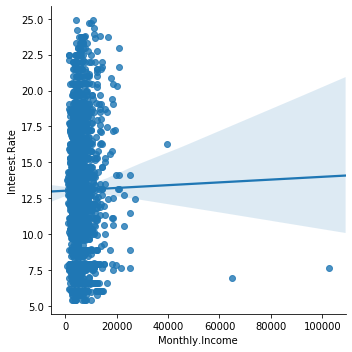

In [407]:
sns.lmplot('Monthly.Income', 'Interest.Rate', data=loansdata)

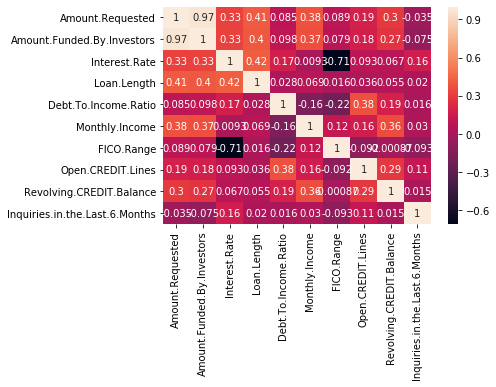

In [390]:
sns.heatmap(loansdata.corr(), annot=True)

In [365]:
print(loansdata.columns)

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')


In [471]:
features = loansdata[['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio','Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']]

features.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
81174,20000,20000.0,8.90,36.0,14.90,6541.67,19,14.0,14272.0,2.0
99592,19200,19200.0,12.12,36.0,28.36,4583.33,15,12.0,11140.0,1.0
80059,35000,35000.0,21.98,60.0,23.81,11500.00,10,14.0,21977.0,1.0
15825,10000,9975.0,9.99,36.0,14.30,3833.33,11,10.0,9346.0,0.0
33182,12000,12000.0,11.71,36.0,18.78,3195.00,11,11.0,14469.0,0.0


In [472]:
label = loansdata['Interest.Rate']
label.head()

81174     8.90
99592    12.12
80059    21.98
15825     9.99
33182    11.71
Name: Interest.Rate, dtype: float64

In [473]:
from sklearn.model_selection import train_test_split

In [474]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [475]:
from sklearn.linear_model import LinearRegression

In [476]:
model = LinearRegression()

In [477]:
model.fit(features_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [478]:
from sklearn.metrics import mean_squared_error

In [479]:
error = mean_squared_error(label_test,model.predict(features_test))

In [480]:
np.sqrt(error)

3.215042263470098e-12

In [482]:
label_test.head()

928      11.03
29653    11.99
46748    22.78
84592    19.72
4730     11.14
Name: Interest.Rate, dtype: float64

In [481]:
model.predict(features_test)[0:5]

array([11.03, 11.99, 22.78, 19.72, 11.14])